This file is part of a program that is used to develop an objective way to
segment the fetus from ultrasound images, and to analyse the effectiveness of 
using the resulting mask to produce an unobstructed visualisation of the fetus.
The research is organised in three phases: (1) noise reduction filters, 
(2a) heuristic segmentation models, (2b) deep learning segmentation
approach (U-net), and (3) the volume visualisation. The program is developed
for the master Computational Science at the UvA from February to November 2020.

This file contains code for the methodology of phase2b. <br>
You can run this file to plot the activation functions. 

Made by Romy Meester


In [1]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import os
import copy
from jupyterthemes import jtplot

In [2]:
jtplot.style(context='paper', fscale=1.6, ticks=True)

In [3]:
# Constants
DATA_PATH = '../datasets/'
RESULTS_PATH = 'results_method'
RESULTS_IMG_PATH = os.path.join(RESULTS_PATH, 'results_phase2b') 

In [4]:
def create_dir(PATH):
    """ Create a directory. """
    try:
        os.mkdir(PATH)
        print('Directory', PATH, 'created' )
    except FileExistsError:
        print('Directory', PATH, 'already exists' )

# create results folder
create_dir(RESULTS_PATH)

# create results folder for the images
create_dir(RESULTS_IMG_PATH)

Directory results_method already exists
Directory results_method\results_phase2b created


# Activation functions

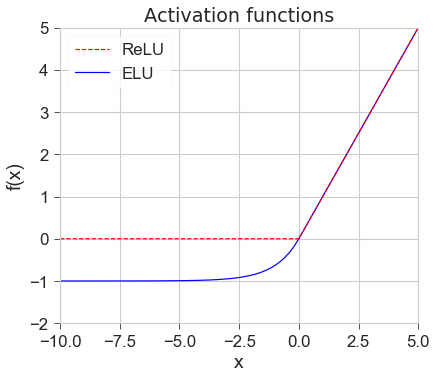

In [5]:
def relu(x):
    """ Rectified Linear Unit (ReLU). """
    return np.maximum(0.0, x)

def elu(arr, alpha):
    """ Exponential Linear Unit (ELU). """
    a = []
    for x in arr:
        if x >= 0:
            a.append(x)
        else:
            a.append(alpha * (np.exp(x)-1))
    return a

# plot 
X = np.arange(-10, 10, .2)

fig,ax = plt.subplots(1)
ax.plot(X, elu(X, 1.0), label = 'ELU', color='blue')
ax.plot(X, relu(X), label = 'ReLU', linestyle='dashed', color='red')
plt.title('Activation functions', fontname="DejaVu Sans")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-10,5)
plt.ylim(-2,5)

handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
ax.legend(handles, labels, loc='best')

plt.tight_layout()
plt.savefig(RESULTS_IMG_PATH + '/' + 'act_relu_elu' + '.png')
plt.show()


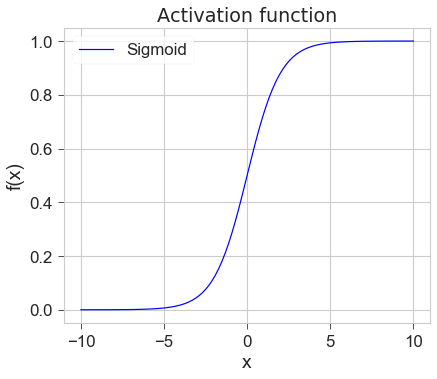

In [6]:
def sigmoid(x):
    """ Sigmoid function. """
    return 1/(1 + np.exp(-x)) 
  
# plot 
x = np.linspace(-10, 10, 100) 

plt.plot(x, sigmoid(x), label = 'Sigmoid', color='blue') 
plt.title('Activation function', fontname="DejaVu Sans")
plt.xlabel("x") 
plt.ylabel("f(x)") 
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(RESULTS_IMG_PATH + '/' + 'act_sigmoid' + '.png')
plt.show() 